# Hierarchical Clustering
-----

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<body style="font-family: 'Gloria Hallelujah', cursive; font-size: 1.4rem; background: whitesmoke; margin: 0; padding: 1rem; display: grid; place-items: center; min-height: 100vh;">
    <center>
	<ul style="list-style-position: inside; width: 600px; max-width: 100%; background: white; box-shadow: 0.25rem 0.25rem 0.75rem rgba(0, 0, 0, 0.15); padding: 0; margin: 0; border-radius: 0.1rem;">
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#1" style="color: #433878; text-decoration: none;">Importing the libraries</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#2" style="color: #433878; text-decoration: none;">Importing the dataset</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#3" style="color: #433878; text-decoration: none;">Data analysis</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#4" style="color: #433878; text-decoration: none;">Get features</a></li>
        <li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#5" style="color: #433878; text-decoration: none;">Data Preprocessing</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#6" style="color: #433878; text-decoration: none;">draw the dendrogram</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#7" style="color: #433878; text-decoration: none;">Training the Hierarchical Clustering model on training set</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#8" style="color: #433878; text-decoration: none;">Plot the clusters</a></li>
		<li style="padding: 1rem; border-bottom: 1px solid lightblue;"><a href="#9" style="color: #433878; text-decoration: none;">Sources</a></li>
	</ul>
  </center>      
</body>

## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("2019.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (156, 9)
Number of rows: 156
Number of columns: 9


In [5]:
dataset.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
dataset.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
dataset.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

<Axes: >

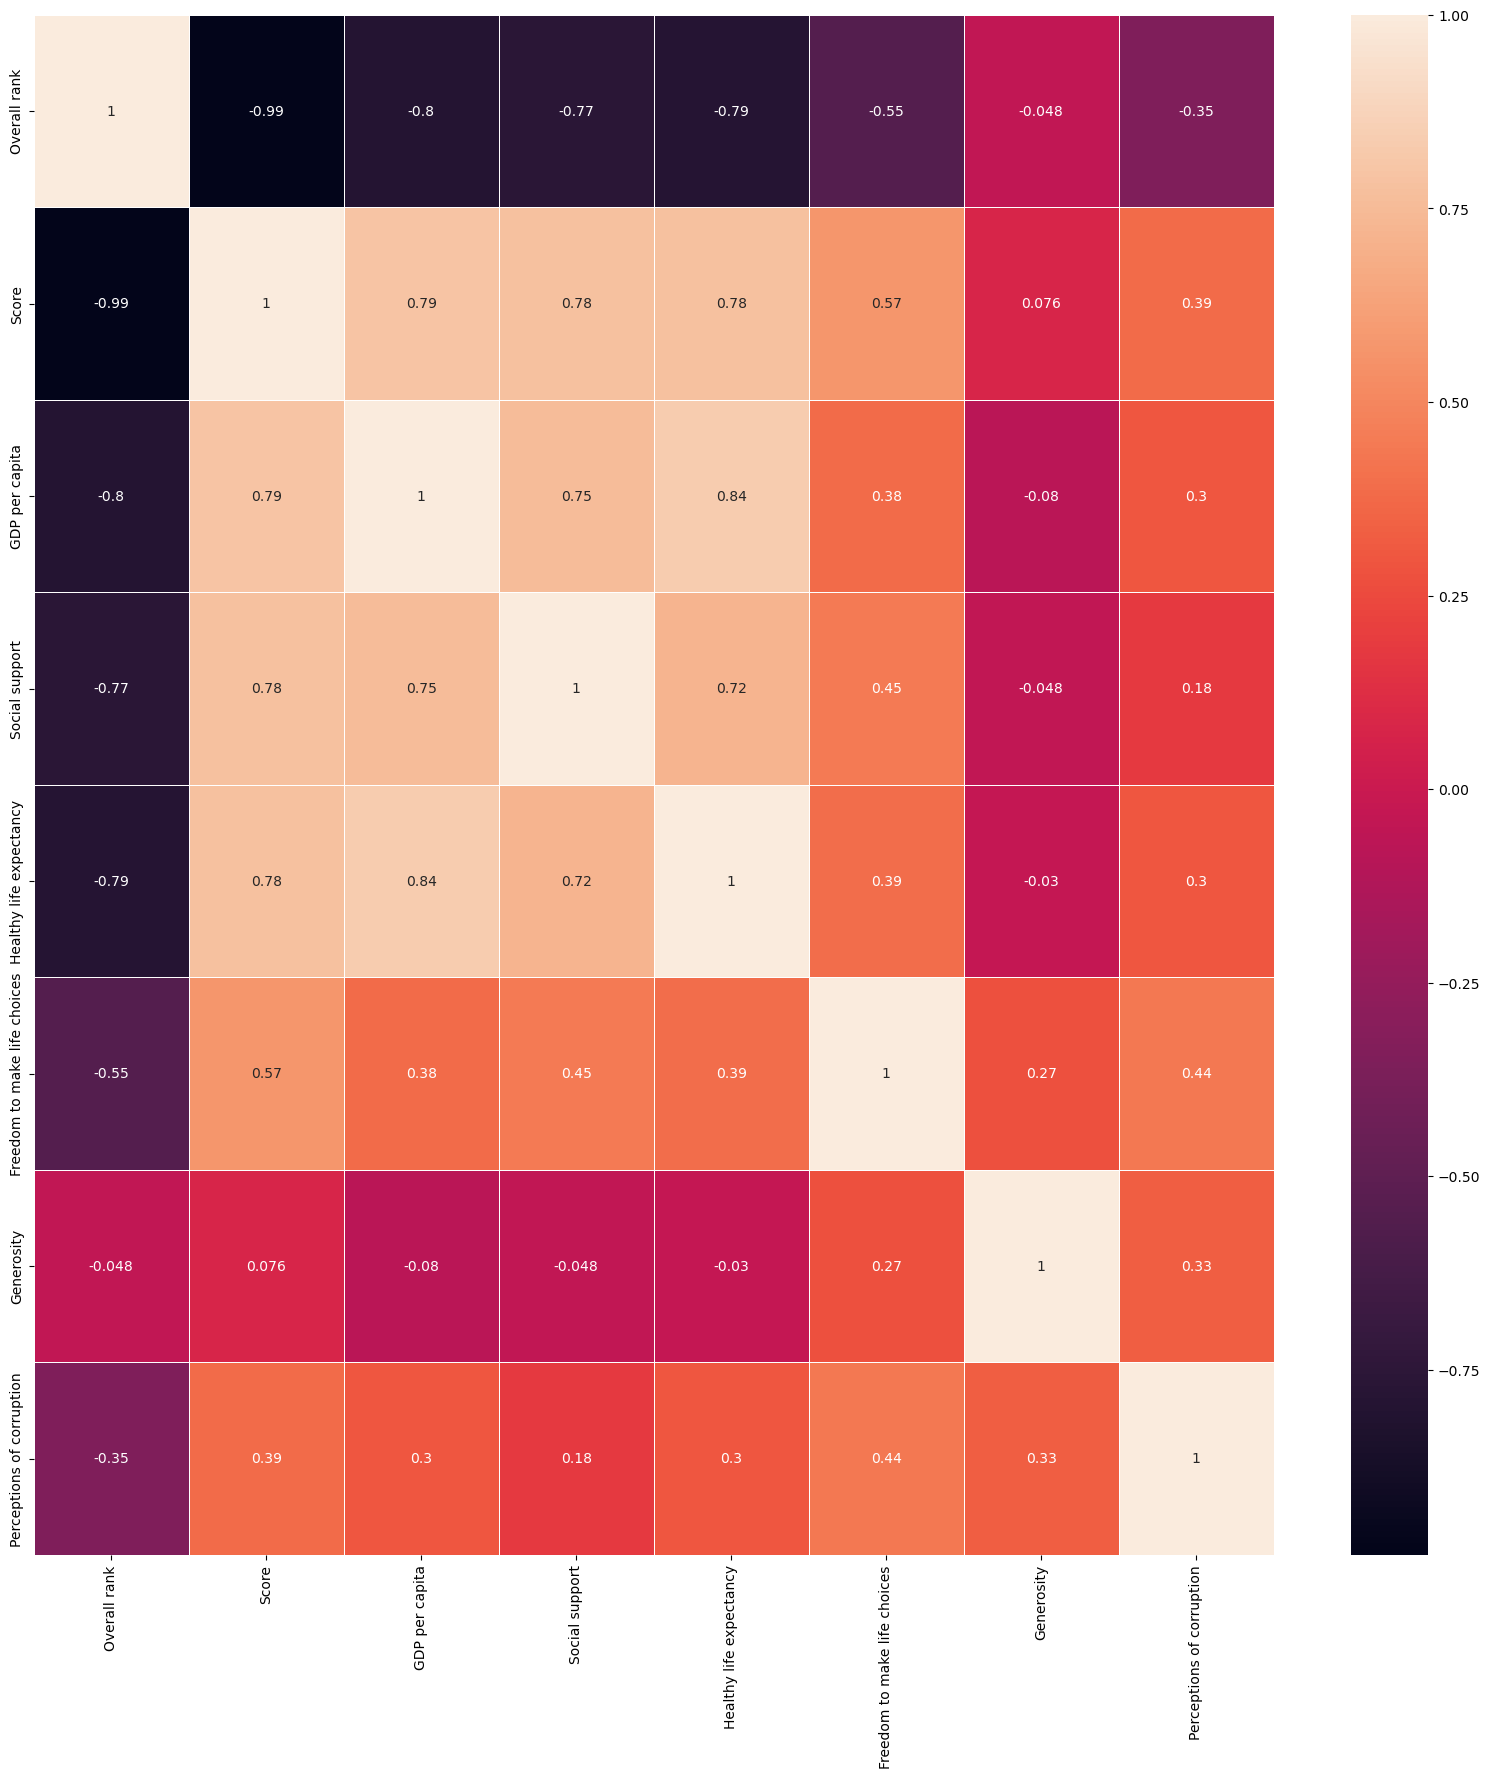

In [10]:
dp = dataset.drop(['Country or region'],axis=1)
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(dp.corr(),annot=True, linewidth=.5, ax=ax)

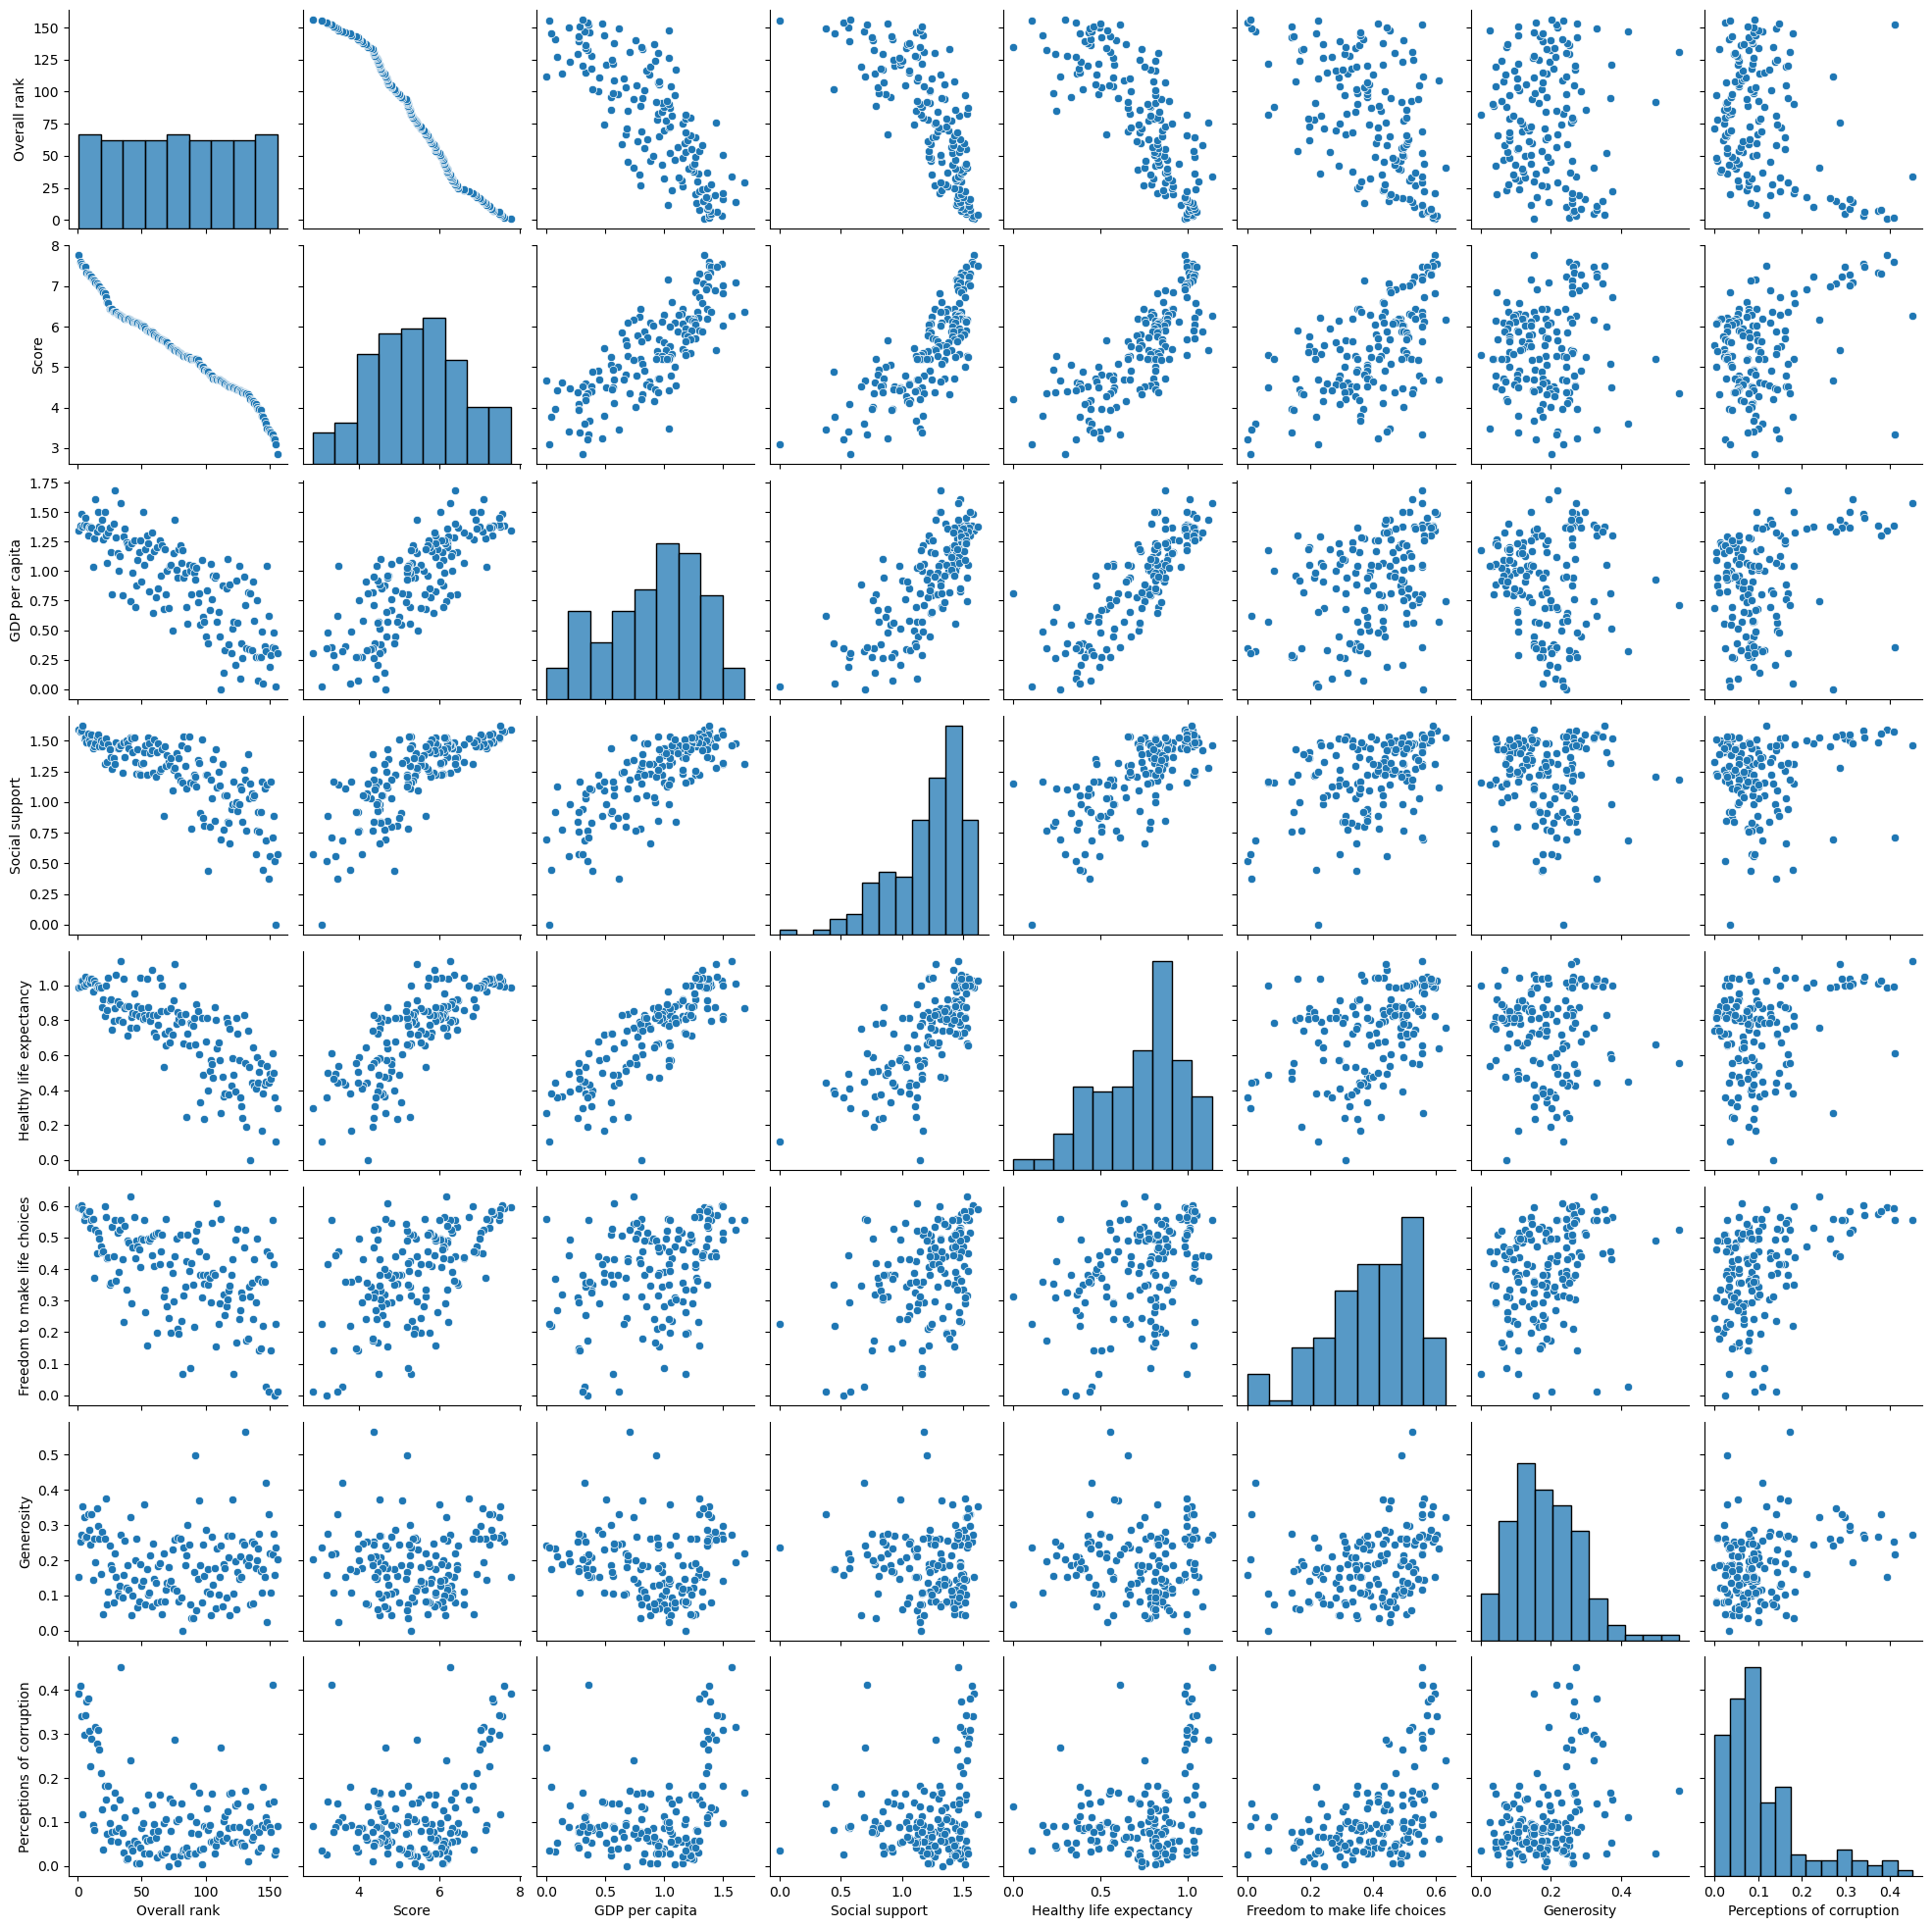

In [11]:
sns.pairplot(dp)

## Step 4: <span id="4" style="color: #4A628A">Get features ✂️ </span>[🔝](#top)

In [12]:

x = dataset.drop(['Country or region','Overall rank'],axis=1)


In [13]:
x

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Step 5: <span id="5" style="color: #4A628A"> Data Preprocessing ✨ </span>[🔝](#top) 

In [14]:
from sklearn.preprocessing import normalize
x_scaled = normalize(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.955020,0.164722,0.195085,0.121206,0.073264,0.018808,0.048310
1,0.952077,0.173253,0.197055,0.124772,0.074162,0.031569,0.051362
2,0.948783,0.186893,0.198699,0.129117,0.075737,0.034038,0.042830
3,0.949879,0.174918,0.205845,0.130048,0.074910,0.044870,0.014957
4,0.952236,0.177527,0.193550,0.127041,0.070833,0.040948,0.037896


## Step 6: <span id="6" style="color: #4A628A">draw the dendrogram </span>[🔝](#top)

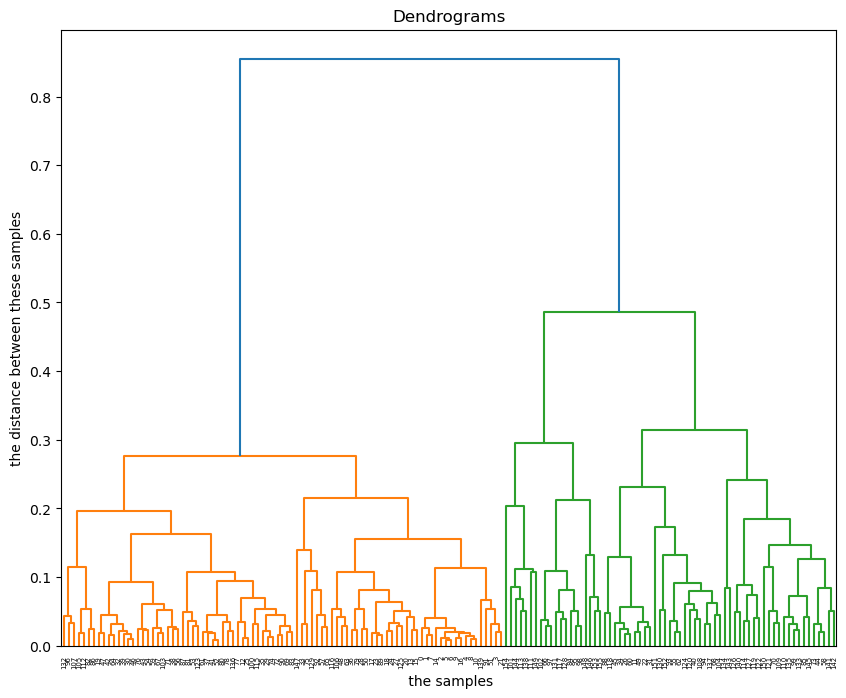

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
plt.xlabel(" the samples")
plt.ylabel("the distance between these samples")
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))


From above elbow plot its clear that clustering scores slows down after 6 number of clusters. So we can use K= 6 for further analysis.

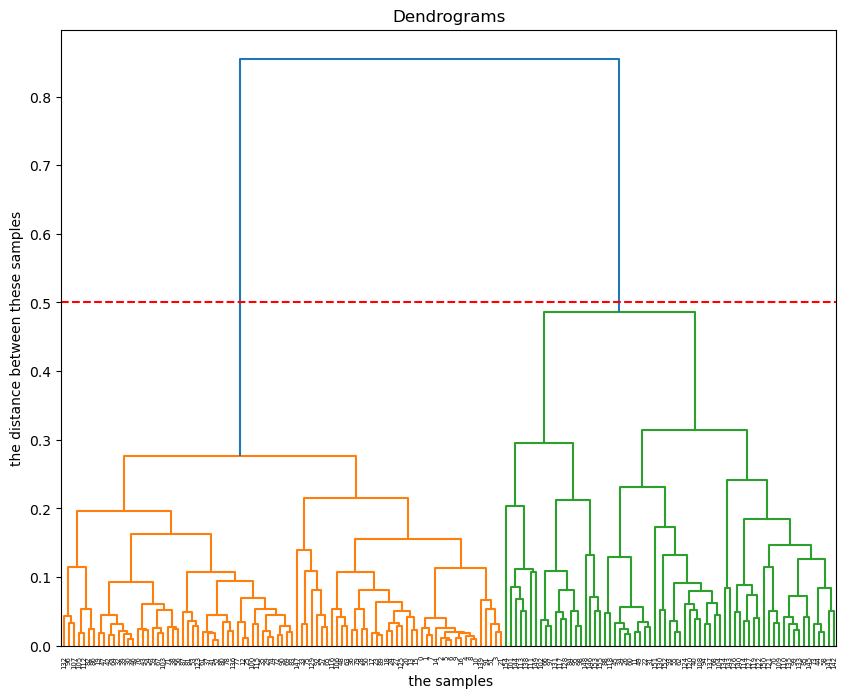

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
plt.xlabel(" the samples")
plt.ylabel("the distance between these samples")
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

## Step 7: <span id="7" style="color: #4A628A">Training the Hierarchical Clustering model on training set 🛠️ </span>[🔝](#top)

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster.fit_predict(x_scaled)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

## Step 8: <span id="8" style="color: #4A628A">Plot the clusters 📊 </span>[🔝](#top)

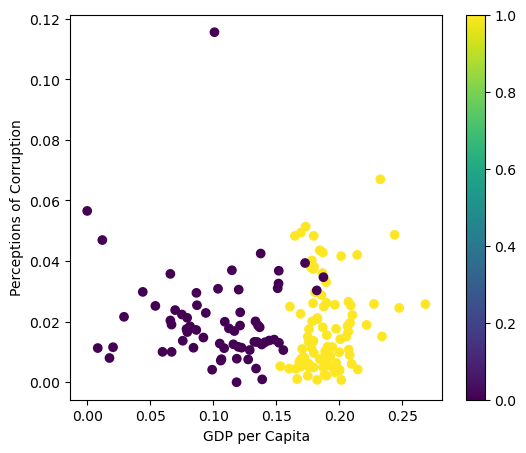

In [18]:
# Plot the clusters
plt.figure(figsize=(6, 5))  
plt.scatter(x_scaled['GDP per capita'], x_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()

## <a id="9">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- kaggle : https://www.kaggle.com/code/avnika22/world-happiness-report-eda-clustering/input
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20